# Reportar Producción Científica

Reportar producción científica para generar CV en español

In [27]:
import csv
#import pandas as pd
import datetime
#!pip install pyparsing
import pyparsing
#!pip install bibtexparser
import bibtexparser

import os
from os import path
from datetime import timedelta

#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Fechas del reporte
date_inicio = datetime.datetime(2008,1,1)
date_fin = datetime.datetime(2024,12,31)

# direccion de la base de datos
database_folder = '../../database/'

#gap en años para reportar clases
date_teach_gap = timedelta(days = 2 * 365)
date_min_teach = date_fin - date_teach_gap

## Read databases

In [29]:
## Papers
with open(database_folder + 'myproducts.bib') as bibtex_file:
    bibtex_str = bibtex_file.read()

bib_database = bibtexparser.loads(bibtex_str)

# Teaching
teaching = []
with open(database_folder + 'teaching.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        teaching.append(dictio)

 
# Talks
talks = []
with open(database_folder + 'talks.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        talks.append(dictio)
        
# Developments
developments = []
with open(database_folder + 'developments.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        developments.append(dictio)
        
        
# Divulgacion
#divulgacion = []
#with open(database_folder + 'divulgacion.csv', 'r') as csvfile:
#    reader = csv.DictReader(csvfile)
#    for row in reader:
#        dictio = dict(row)
#        divulgacion.append(dictio)
#print(divulgacion)


In [30]:
# Papers and thesis

count = 0
count_jcr = 0
count_cona = 0
count_proc = 0
count_mt = 0
count_preprint = 0
count_otros = 0
count_divul = 0
count_phd = 0

jcr_entries = []
proc_entries = []
mt_entries = []
cona_entries = []
preprint_entries = []
otros_entries = []
divul_entries = []
phd_entries = []

for entry in bib_database.entries:
    #print(entry)
    entry_date = datetime.datetime(int(entry['year']), int(entry['month']), 1)
    #if int(entry['year']) >= int(inicio['year']) and int(entry['year']) <= int(fin['year']):
    if date_inicio <= entry_date and entry_date <= date_fin:
        count = count +1
        #print(prod)
        
        if entry['ENTRYTYPE'] == 'article':
            if entry['note'] == 'jcr':
                jcr_entries.append(entry)
                count_jcr += 1
                
            elif entry['note'] == 'conacyt':
                cona_entries.append(entry)
                count_cona += 1
                
            elif entry['note'] == 'divulgacion':
                divul_entries.append(entry)
                count_divul += 1
                
            else:
                otros_entries.append(entry)
                count_otros += 1
            
        if entry['ENTRYTYPE'] == 'inproceedings':
            proc_entries.append(entry)
            count_proc += 1
            
        if entry['ENTRYTYPE'] == 'mastersthesis':
            mt_entries.append(entry)
            count_mt += 1

        if entry['ENTRYTYPE'] == 'phdthesis':
            phd_entries.append(entry)
            count_phd += 1
            
        if entry['ENTRYTYPE'] == 'unpublished':
            preprint_entries.append(entry)
            count_preprint += 1
        
print(f"{count} products found")
print(f"{count_jcr} JCR products found")
print(f"{count_proc} Proceedings found")
print(f"{count_mt} Master Thesis found")
print(f"{count_phd} PhD Thesis found")
print(f"{count_cona} conacyt articles")
print(f"{count_cona} conacyt articles")
print(f"{count_preprint} preprints")
print(f"{count_divul} divulgacion")
print(f"{count_otros} otros")

52 products found
20 JCR products found
15 Proceedings found
7 Master Thesis found
4 PhD Thesis found
0 conacyt articles
0 conacyt articles
2 preprints
4 divulgacion
0 otros


In [31]:
# list products between dates
#count_activ = 0

#activities_dv = []
#for activ in divulgacion:
    #print(toDate(subject['Inicio']).year)
#    if date_inicio <= toDate(activ['Date']) and date_fin >= toDate(activ['Date']):
#        count_activ += 1
#        activities_dv.append(activ)
        
#print(f"{count_activ} actividades de divulación o vinculación")


In [32]:
# Verificar que existe el folder
if not path.exists('text'):
    os.mkdir('text')
    
#print ("directory exists:" + str(path.exists('text')))
#os.mkdir(path)

## Publicaciones

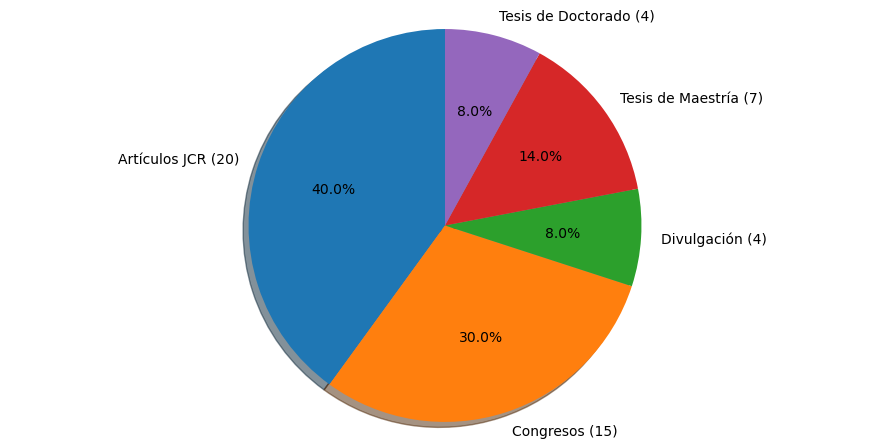

In [33]:
labels = []
publicaciones = []

# Graficar los productos
if count_jcr > 0:
    publicaciones.append(count_jcr)
    labels.append(f"Artículos JCR ({str(count_jcr)})")
    
if count_proc > 0:
    publicaciones.append(count_proc)
    labels.append(f"Congresos ({str(count_proc)})")

if count_divul > 0:
    publicaciones.append(count_divul)
    labels.append(f"Divulgación ({str(count_divul)})")

if count_mt > 0:
    publicaciones.append(count_mt)
    labels.append(f"Tesis de Maestría ({str(count_mt)})")

if count_phd > 0:
    publicaciones.append(count_phd)
    labels.append(f"Tesis de Doctorado ({str(count_phd)})")

if count_cona > 0:
    publicaciones.append(count_cona)
    labels.append(f"Artículos Conacyt ({str(count_cona)})")
    
#if count_preprint > 0:
#    publicaciones.append(count_preprint)
#    labels.append(f"Preprints ({str(count_preprint)})")


    
#if count_otros > 0:
#publicaciones.append(count_otros)
#labels.append("Otros")

fig, ax1 = plt.subplots(figsize=(9, 4.5), subplot_kw=dict(aspect="equal"))

ax1.pie(publicaciones, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig("text/products.pdf", format='pdf')
plt.savefig("text/products.png", format='png')
plt.show()


In [34]:
# Crear un archivo .tex para la producción científica
# Articulos JCR

# write data in a file. 
file1 = open("text/jcr_journals.tex","w") 
#L = ["This is Delhi \n","This is Paris \n","This is London \n"]  
  
# \n is placed to indicate EOL (End of Line) 
if count_jcr > 0:
    file1.write("\\begin{itemize} \n") 
    
    jcr_entries = sorted(jcr_entries, key = lambda i: i['year'], reverse = True)
    
    for entry in jcr_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']},\\textit{{ {entry['journal']},}} ({entry['year']}),") 
        if 'doi' in entry.keys():
            file1.write(f" \\href{{{entry['doi']}}} {{\\faFilePdfO}},")
        file1.write(f" I.F. {entry['if']} \n")
    file1.write("\\end{itemize} \n")                     
                                        
file1.close() #to change file access modes 


In [35]:
# CONACYT

# write data in a file. 
file1 = open("text/conacyt_journals.tex","w") 
#L = ["This is Delhi \n","This is Paris \n","This is London \n"]    
                    
if count_cona > 0:
    file1.write("\\begin{itemize} \n") 
    
    cona_entries = sorted(cona_entries, key = lambda i: i['year'], reverse = True)
    
    for entry in cona_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']},\\textit{{ {entry['journal']},}} ({entry['year']}) \n") 
                    
    file1.write("\\end{itemize} \n")                  
                                        
file1.close() #to change file access modes 

In [36]:
# CONFERENCIAS

# write data in a file. 
file1 = open("text/proceedings.tex","w") 
                                      
if count_proc > 0:
   file1.write("\\begin{itemize} \n") 
                    
   proc_entries = sorted(proc_entries, key = lambda i: i['year'], reverse = True)
                    
   for entry in proc_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']}, \\textit{{ {entry['booktitle']},}} {entry['year']}")        
        if 'doi' in entry.keys():
            file1.write(f", \\href{{{entry['doi']}}} {{\\faFilePdfO}}")
        file1.write(f" \n")
        
   file1.write("\\end{itemize} \n")                     
                                        
file1.close() #to change file access modes 

## Estudiantes

Crear un archivo tex para la formación de recursos humanos

In [37]:
# MAESTRIA

# write data in a file. 
file1 = open("text/master_students.tex","w")

#file1.write("\\item{\\bf GRADUATED MASTER STUDENTS: }\n")
    
if count_mt > 0:
    #file1.write("Tesis de maestría dirigidas: \n")
    file1.write("\\begin{itemize} \n")
    
    mt_entries = sorted(mt_entries, key = lambda i: i['year'], reverse = True)
                    
    for entry in mt_entries:
        file1.write(f"\\item {entry['author']}, \\textit{{ {entry['title']} }}, \\href{{ {entry['link']} }}{{\\faFilePdfO}}, {entry['year']}, {entry['school']}. \n")        

    file1.write("\\end{itemize} \n") 
                    
file1.close() #to change file access modes 

In [38]:
# DOCTORADO 

# Write data in a file
file1 = open("text/phd_students.tex","w")

if count_mt > 0:
    file1.write("\\begin{itemize} \n")
    
    phd_entries = sorted(phd_entries, key = lambda i: i['year'], reverse = True)
                    
    for entry in phd_entries:
        file1.write(f"\\item {entry['author']}, \\textit{{ {entry['title']} }}, \\href{{ {entry['link']} }}{{\\faFilePdfO}}, {entry['year']}, {entry['school']}. \n")        

    file1.write("\\end{itemize} \n") 
                    
file1.close() #to change file access modes 

## Clases

In [39]:
# Teaching
def toDate(cadena):
    return datetime.datetime.strptime(cadena, '%Y/%m/%d')

# list products between dates
count_sub = 0
total_hours = 0

if len(teaching) > 0:
    # Contar horas
    #for subject in teaching:
        #print(toDate(subject['Inicio']).year)
    #    if date_inicio <= toDate(subject['Inicio']) and date_fin >= toDate(subject['Fin']) and date_min_teach <= toDate(subject['Inicio']):
    #        count_sub += 1
            #total_hours += int(subject['Horas'])     
            
    # write data in a file. 

    #if count_sub>0:
    file1 = open("text/teaching.tex","w")
    #teaching = sorted(teaching, key = lambda i: i['year'], reverse = True)
    
    file1.write("\\begin{itemize} \n")
                    
    for entry in teaching:
        if date_inicio <= toDate(entry['Inicio']) and date_fin >= toDate(entry['Fin']) and date_min_teach <= toDate(entry['Inicio']):
            file1.write(f"\\item {entry['Inicio']}, \\textit{{ {entry['Nombre']},}} nivel {entry['Nivel']}, {entry['Horas']} horas. \n")        
            count_sub += 1
            total_hours += int(entry['Horas'])     

    file1.write("\\end{itemize} \n") 
                        
    file1.close() #to change file access modes 

    print(f"{count_sub} materias impartidas")
    print(f"{total_hours} horas impartidas")


24 materias impartidas
1485 horas impartidas


## Desarrollos tecnológicos

In [40]:
# Desarrollos tecnológicos

file1 = open("text/developments.tex","w")

if len(developments) > 0:
    #teaching = sorted(teaching, key = lambda i: i['year'], reverse = True)
    file1.write("\\begin{itemize} \n")
                    
    for entry in developments:
        file1.write(f"\\item {entry['Date']}, \\textit{{ {entry['Name']},}} {entry['User']}, {entry['License']}, {entry['Validation']} \n")        

    file1.write("\\end{itemize} \n") 
                    
file1.close() #to change file access modes 

## Vinculación y divulgación

In [41]:
# Talks

# write data in a file. 
file1 = open("text/talks.tex","w")

if len(talks) > 0:
    file1.write("\\begin{itemize} \n") 
    
    talks = sorted(talks, key = lambda i: i['year'], reverse = True)
        
    for entry in talks:
        if entry['Type'] == 'platica':
            if date_inicio <= toDate(entry['Date']) and date_fin >= toDate(entry['Date']):
                file1.write(f"\\item {entry['Date']}, {entry['Title']}, en \\textit{{ {entry['Event']},}} {entry['Place']} \n")            

    file1.write("\\end{itemize} \n") 
                        
file1.close() #to change file access modes 

In [42]:
# Workshops

# write data in a file. 
file1 = open("text/workshop.tex","w")

if len(talks) > 0:
    file1.write("\\begin{itemize} \n") 
    
    talks = sorted(talks, key = lambda i: i['year'], reverse = True)
        
    for entry in talks:
        if entry['Type'] == 'taller':
            file1.write(f"\\item {entry['Date']}, {entry['Title']}, en \\textit{{ {entry['Event']},}} {entry['Place']} \n")            

    file1.write("\\end{itemize} \n") 
                        
file1.close() #to change file access modes 

In [43]:
# Divulgación
# write data in a file. 
file1 = open("text/divulgacion.tex","w") 
#L = ["This is Delhi \n","This is Paris \n","This is London \n"]  
  
# \n is placed to indicate EOL (End of Line) 
if count_jcr > 0:
    file1.write("\\begin{itemize} \n") 
    
    jcr_entries = sorted(divul_entries, key = lambda i: i['year'], reverse = True)
    
    for entry in jcr_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']},\\textit{{ {entry['journal']},}} ({entry['year']})\n") 
                    
    file1.write("\\end{itemize} \n")                     
                                        
file1.close() #to change file access modes 

In [44]:
# Eventos
# write data in a file. 
file1 = open("text/eventos.tex","w") 
  
if len(talks) > 0:
    file1.write("\\begin{itemize} \n") 
    
    talks = sorted(talks, key = lambda i: i['year'], reverse = True)
        
    for entry in talks:
        if entry['Type'] == 'evento':
            if date_inicio <= toDate(entry['Date']) and date_fin >= toDate(entry['Date']):
                file1.write(f"\\item {entry['Date']}, {entry['Title']}, en \\textit{{ {entry['Event']},}} {entry['Place']}")            
                if entry['Link'] != '':
                    file1.write(f", \\href{{{entry['Link']}}}{{\\faFilePdfO}}")
                file1.write(f".\n")

    file1.write("\\end{itemize} \n") 
                        
file1.close() #to change file access modes 

In [45]:
# Entrevistas

file1 = open("text/entrevistas.tex","w") 

if len(talks) > 0:
    file1.write("\\begin{itemize} \n") 
    
    talks = sorted(talks, key = lambda i: i['year'], reverse = True)
        
    for entry in talks:
        if entry['Type'] == 'entrevista':
            if date_inicio <= toDate(entry['Date']) and date_fin >= toDate(entry['Date']):
                file1.write(f"\\item {entry['Date']}, {entry['Title']}, en \\textit{{ {entry['Event']},}} {entry['Place']}")            
                if entry['Link'] != '':
                    file1.write(f", \\href{{{entry['Link']}}}{{\\faYoutubePlay}}")
                file1.write(f".\n")

    file1.write("\\end{itemize} \n") 
                        
file1.close() #to change file access modes 
  

### Preprints

In [46]:
# Crear un archivo .tex para los preprints
  
if count_preprint > 0:
    # write data in a file. 
    file1 = open("text/preprints.tex","w") 

    #file1.write("\n Preprints:")
    file1.write("\\begin{itemize} \n") 
    
    for entry in preprint_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']}, {entry['journal']}, {entry['year']}, \\href{{{entry['link']}}}{{\\faFilePdfO}} \n") 
                    
    file1.write("\\end{itemize} \n") 
                    
    file1.close() #to change file access modes 
else:
    # write data in a file. 
    file1 = open("text/preprints.tex","w") 

    file1.close() #to change file access modes 

### Call latex


In [47]:
# execute latex
os.system('cd templates; pdflatex -synctex=1 -interaction=nonstopmode cv_jivg_es_full.tex')

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./cv_jivg_es_full.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/fancyhdr/fancyhdr.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/s

0

In [48]:
# open
os.system('xdg-open templates/cv_jivg_es_full.pdf > /dev/null')

0